<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Laplacian-and-Sobel" data-toc-modified-id="Laplacian-and-Sobel-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Laplacian and Sobel</a></span><ul class="toc-item"><li><span><a href="#Laplacian" data-toc-modified-id="Laplacian-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Laplacian</a></span></li><li><span><a href="#Sobel" data-toc-modified-id="Sobel-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Sobel</a></span></li></ul></li><li><span><a href="#Canny-edge-detector" data-toc-modified-id="Canny-edge-detector-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Canny edge detector</a></span></li></ul></div>

# Gradients and edge detection
- edge detection: find points in an image where the brightness of pixels changes distinctly

In [1]:
import cv2
import matplotlib.pyplot as plt

b, g, r = cv2.split(cv2.imread('coins.png'))
coins = cv2.cvtColor(cv2.merge([r, g, b]), cv2.COLOR_BGR2GRAY)
plt.imshow(coins, cmap='gray')
plt.axis('off')
plt.show()

<Figure size 640x480 with 1 Axes>

## Laplacian and Sobel

### Laplacian

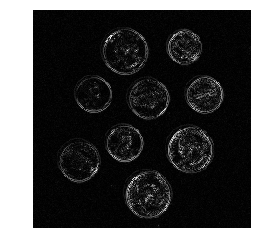

In [2]:
import numpy as np

laplacian = cv2.Laplacian(coins, cv2.CV_64F)
laplacian = np.uint8(np.absolute(laplacian))

plt.imshow(laplacian, cmap='gray')
plt.axis('off')
plt.show()

### Sobel

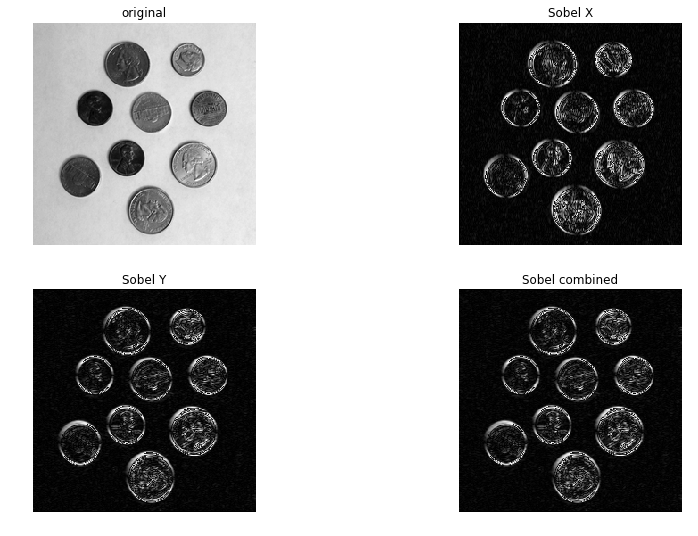

In [3]:
# last arguments specify the order of derivatives along x and y axis
sobelX = cv2.Sobel(coins, cv2.CV_64F, 1, 0)  
sobelY = cv2.Sobel(coins, cv2.CV_64F, 0, 1)

sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))
sobelCombined = cv2.bitwise_or(sobelX, sobelY)

images = [coins, sobelX, sobelY, sobelY]
descriptions = ['original', 'Sobel X', 'Sobel Y', 'Sobel combined']
fig, axs = plt.subplots(2, 2, squeeze=True, figsize=(14, 9))

for image, description, ax in zip(images, descriptions, axs.reshape(-1)):
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    ax.set_title(description)
plt.show()    

## Canny edge detector
- Sobel and Laplacian edge detection are very noisy 
- Canny edge detector blurs the image to remove noise
- computes Sobel gradient images in x and y direction
- suppresses edges
- hysteresis thresholding stage

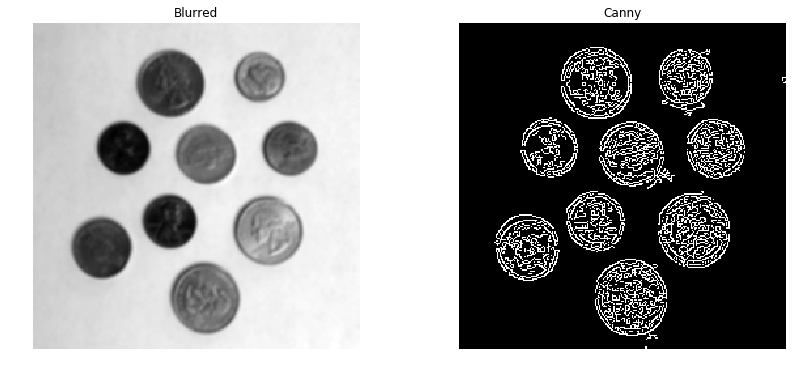

In [4]:
kernel_size = (5, 5)
blurred = cv2.GaussianBlur(coins, kernel_size, 0)

lower_threshold = 30  # lower threshold for which a gradient is considered to be an edge
upper_threshold = 150 # upper threshold for which a gradient is considered to be an edge
canny = cv2.Canny(image, lower_threshold, upper_threshold)

images = [blurred, canny]
descriptions = ['Blurred', 'Canny']
fig, axs = plt.subplots(nrows=1, ncols=2, squeeze=True, figsize=(14, 6))

for image, description, ax in zip(images, descriptions, axs):
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    ax.set_title(description)
plt.show()

In [5]:
def auto_canny(image, sigma=0.33):
    """Automatically find lower and upper threshold for Canny edge detector using statistics."""
    median = np.median(image)
    
    lower = int(max(0, (1.0 - sigma) * median))
    upper = int(min(255, (1.0 + sigma) * median))
    edged = cv2.Canny(image, lower, upper)
    
    return edged

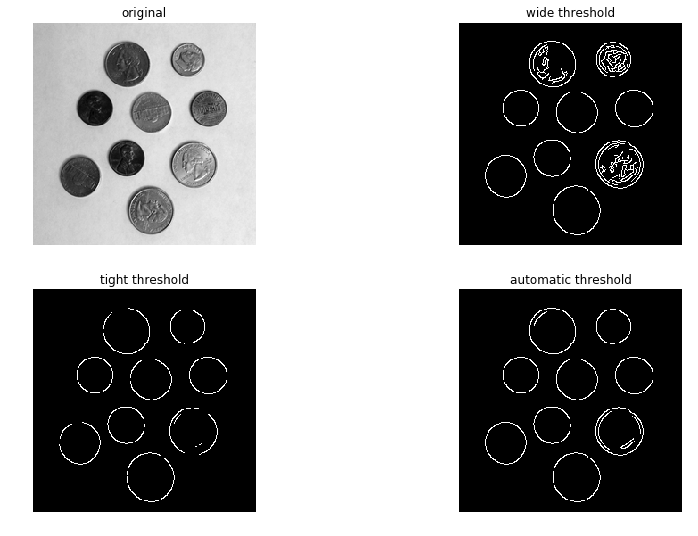

In [6]:
wide = cv2.Canny(blurred, 10, 200)
tight = cv2.Canny(blurred, 225, 250)
auto = auto_canny(blurred)

images = [coins, wide, tight, auto]
descriptions = ['original', 'wide threshold', 'tight threshold', 'automatic threshold']
fig, axs = plt.subplots(2, 2, squeeze=True, figsize=(14, 9))

for image, description, ax in zip(images, descriptions, axs.reshape(-1)):
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    ax.set_title(description)
plt.show()

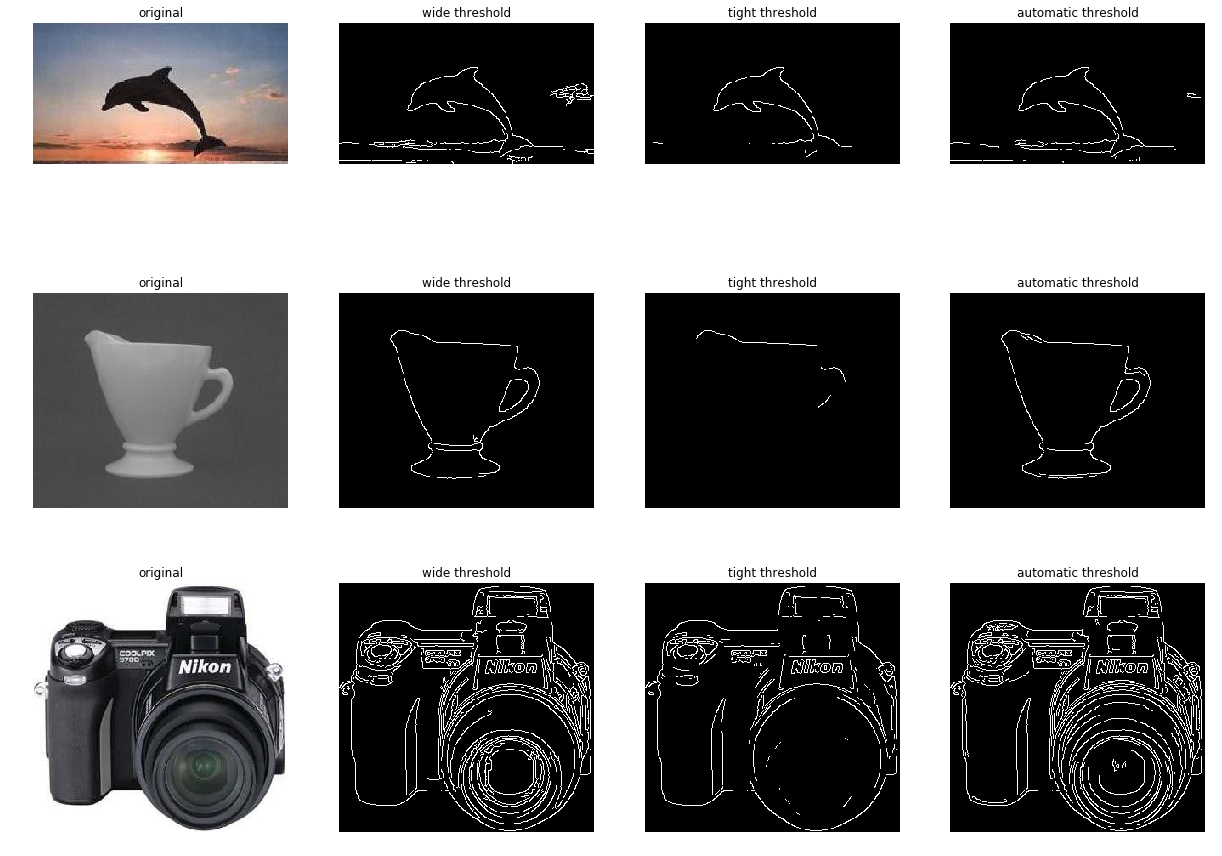

In [7]:
file_names = ['Dolphin.jpg', 'Cup.jpg', 'Camera.jpg']

images = []
for file in file_names:
    b, g, r = cv2.split(cv2.imread(file))
    image = cv2.merge([r, g, b])
    images.append(image)
    
descriptions = ['original', 'wide threshold', 'tight threshold', 'automatic threshold']
fig, axs = plt.subplots(ncols=len(descriptions), nrows=len(images), figsize=(21, 16), squeeze=True)

for image, axs_row in zip(images, axs.reshape(len(images), len(descriptions))):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (3, 3), 0)
    
    wide = cv2.Canny(blurred, 10, 200)
    tight = cv2.Canny(blurred, 225, 250)
    auto = auto_canny(blurred)
    cannies = [image, wide, tight, auto]
    
    for ax, description, canny in zip(axs_row, descriptions, cannies):
        ax.imshow(canny, cmap='gray')
        ax.axis('off')
        ax.set_title(description)
plt.show()